# ARMA 

On tente en Journalier, puis en hourly plus tard 

On a besoin d'une serie stationnaire. On peut stationnariser notre série en effectuant une différentiation à l'ordre 1.  

In [1]:
import pandas as pd

# ici, on peut en soit directement charger depuis l'API 

data = pd.read_csv('BTCUSDT_daily_2023.csv')

data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-01-01,16541.77,16628.00,16499.01,16616.75,96925.41374,1672617599999,1.604794e+09,3218355,48548.78168,8.038417e+08,0
1,2023-01-02,16617.17,16799.23,16548.70,16672.87,121888.57191,1672703999999,2.034683e+09,4036118,60925.25948,1.017075e+09,0
2,2023-01-03,16672.78,16778.40,16605.28,16675.18,159541.53733,1672790399999,2.662766e+09,5097596,79595.76246,1.328471e+09,0
3,2023-01-04,16675.65,16991.87,16652.66,16850.36,220362.18862,1672876799999,3.709833e+09,6310703,109747.11502,1.847617e+09,0
4,2023-01-05,16850.36,16879.82,16753.00,16831.85,163473.56641,1672963199999,2.751080e+09,4842014,80959.57162,1.362472e+09,0


In [8]:
data.dtypes

timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                        int64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
ignore                            int64
dtype: object

In [12]:
# Mini cleaning :

# variable date en format date 
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [13]:
# check is on a des NA 
data.isnull().sum() # on n'a pas de NA

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

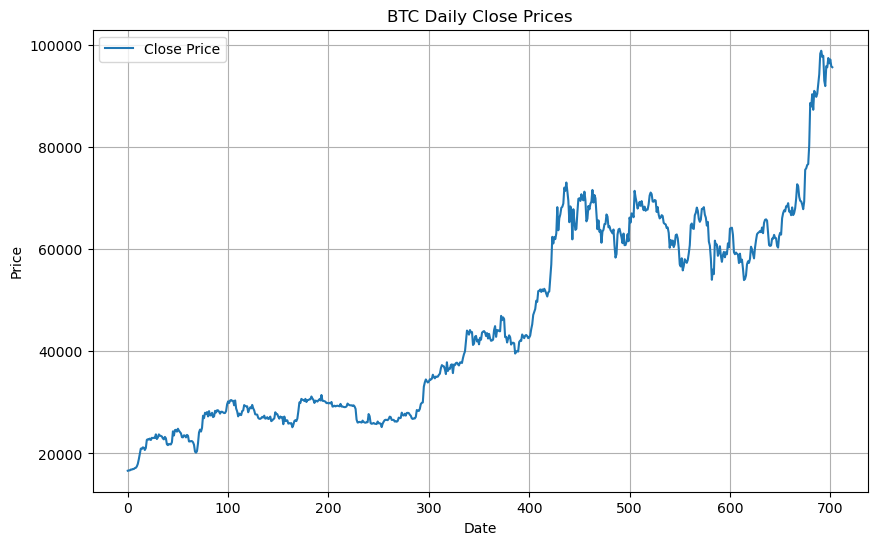

In [14]:
# On plotte les series brutes vs. différentiées

import matplotlib.pyplot as plt

# Plot 'close' price
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['close'], label='Close Price')
plt.title('BTC Daily Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


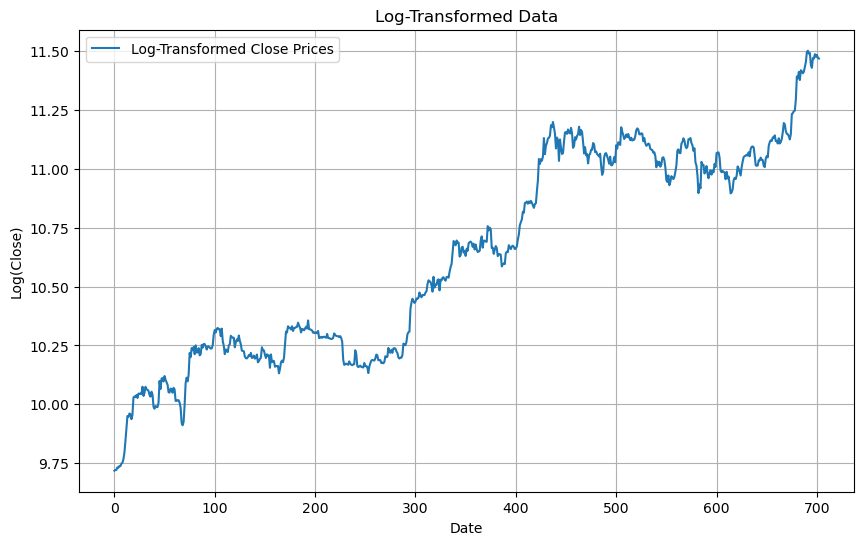

In [15]:
# La serie n'a pas l'air stationnaire : on applique une transformation 


# Log transformation - ne permet pas d'obtenir une serie stationnaire

import numpy as np

# Apply log transformation to the 'close' column
data['log_close'] = np.log(data['close'])

# Plot the transformed data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['log_close'], label='Log-Transformed Close Prices')
plt.title('Log-Transformed Data')
plt.xlabel('Date')
plt.ylabel('Log(Close)')
plt.legend()
plt.grid()
plt.show()

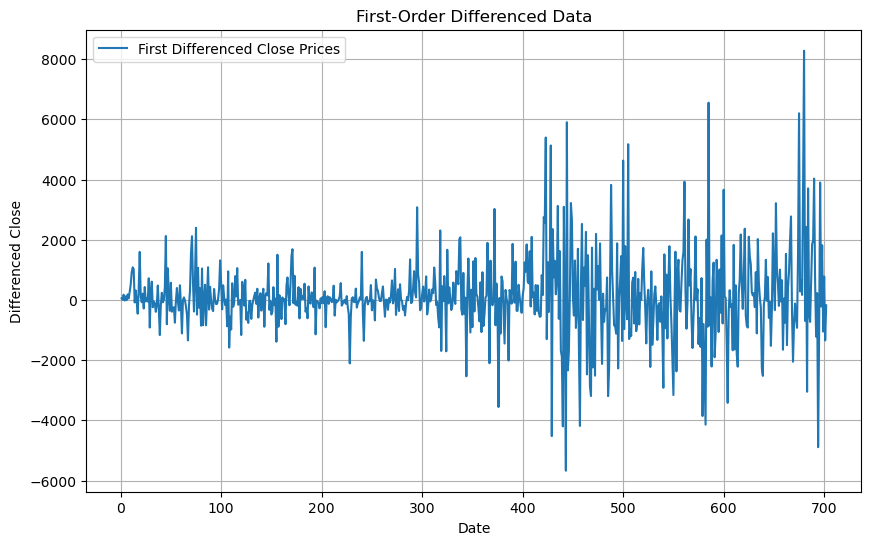

In [16]:
# Avec le First differencing, on obtient une serie qui n'a toujours pas l'air stationnaire

# Apply first-order differencing
data['close_diff'] = data['close'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['close_diff'], label='First Differenced Close Prices')
plt.title('First-Order Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.legend()
plt.grid()
plt.show()

La serie n'est toujours pas stationnaire : la moyenne semble constante, mais pas la variance (on a de l'heteroskedasticité, la magnitude de la série augmente a mesure que le temps augmente) et l'autocorrelation semble positive (les valeurs dépendent de leurs valeurs passées).

On essaie des différentiation à ordres plus élevés. 

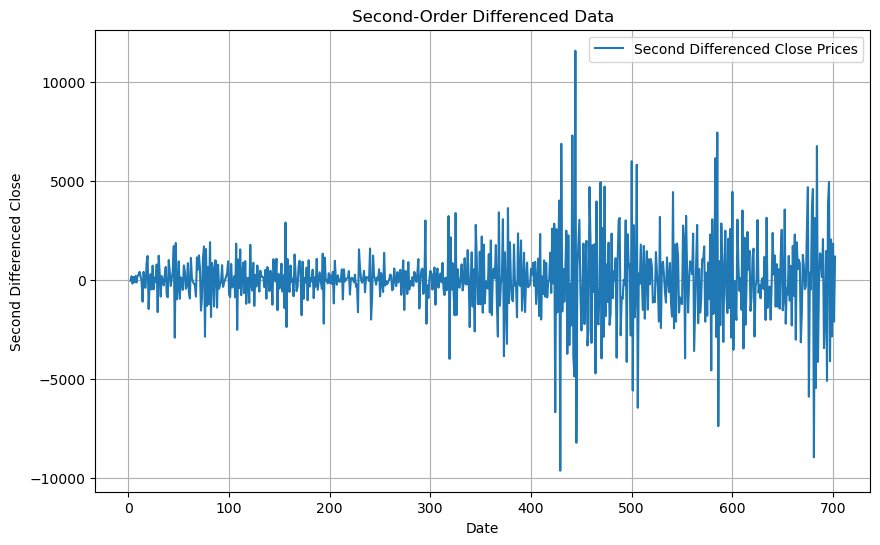

In [17]:
# differencing of order 2 

data['close_diff2'] = data['close_diff'].diff()

# Plot second-order differenced data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['close_diff2'], label='Second Differenced Close Prices')
plt.title('Second-Order Differenced Data')
plt.xlabel('Date')
plt.ylabel('Second Differenced Close')
plt.legend()
plt.grid()
plt.show()

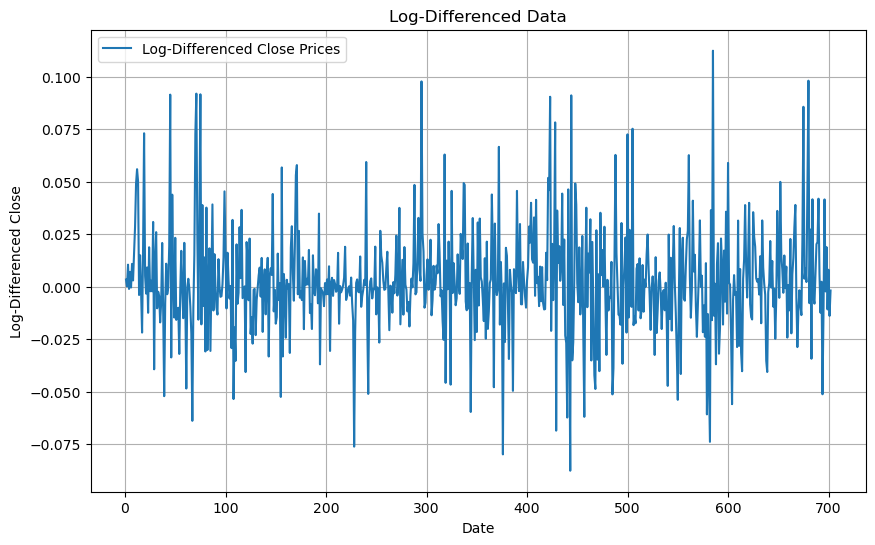

In [18]:
# Apply log transformation followed by differencing
data['log_close_diff'] = np.log(data['close']).diff()

# Plot the log-differenced data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['log_close_diff'], label='Log-Differenced Close Prices')
plt.title('Log-Differenced Data')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Close')
plt.legend()
plt.grid()
plt.show()

La transformation log différentiée d'ordre 1 semble stationnaire. On effectue des tests de stationnarité pour s'en assurer : 

In [30]:
# 1. Tests de stationnarité 

# On va utiliser le test ADF. Pour cela, il faut spécifier les hypothèses du test. 
# On effectue une régression pour vérifier l'hypothèse de tendance linéaire dans le test, ou non : 

# Mini cleaning d'abord

In [ ]:
data['timestamp'] = (data['timestamp'] - data['timestamp'].min()).dt.days


In [23]:
print(data['log_close_diff'].isna().sum())  # Nombre de NaN dans log_close_diff


1


In [24]:
print(data['timestamp'].isna().sum())       # Nombre de NaN dans timestamp


0


In [28]:
data_cleaned = data.dropna(subset=['log_close_diff', 'timestamp'])
data_cleaned.head

<bound method NDFrame.head of      timestamp      open      high       low     close        volume  \
1            1  16617.17  16799.23  16548.70  16672.87  121888.57191   
2            2  16672.78  16778.40  16605.28  16675.18  159541.53733   
3            3  16675.65  16991.87  16652.66  16850.36  220362.18862   
4            4  16850.36  16879.82  16753.00  16831.85  163473.56641   
5            5  16831.85  17041.00  16679.00  16950.65  207401.28415   
..         ...       ...       ...       ...       ...           ...   
698        698  95643.99  98619.99  95364.99  97460.00   27701.78231   
699        699  97460.00  97463.95  96092.01  96407.99   14503.83306   
700        700  96407.99  97836.00  95693.88  97185.18   16938.60452   
701        701  97185.17  98130.00  94395.00  95840.62   37958.66981   
702        702  95840.61  96305.52  93578.17  95662.39   28798.23780   

        close_time  quote_asset_volume  number_of_trades  \
1    1672703999999        2.034683e+09       

In [29]:

# Maintenant, refaire la régression
X = data_cleaned['timestamp']
y = data_cleaned['log_close_diff']

# Régression linéaire avec constante et tendance
model = sm.OLS(y, sm.add_constant(X)).fit()

# Afficher les résultats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_close_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03361
Date:                Mon, 16 Dec 2024   Prob (F-statistic):              0.855
Time:                        07:30:45   Log-Likelihood:                 1583.8
No. Observations:                 702   AIC:                            -3164.
Df Residuals:                     700   BIC:                            -3154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.002      1.459      0.1

In [37]:
# La p-value élevée pour le terme timestamp et l'intercept montre qu'il n'y a pas de tendance linéaire

from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la série log_close_diff
result = adfuller(data_cleaned['log_close_diff'], regression='n') # 'n', c'est l'hypothese sans constante ni trend

# Afficher les résultats du test ADF
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -17.40565567967126
p-value: 9.228278008980036e-29
Critical Values: {'1%': np.float64(-2.5689414020408163), '5%': np.float64(-1.9413904906034987), '10%': np.float64(-1.6164460362565596)}


La p-value est extrêmement petite (pratiquement zero), inférieure à 0.05. On rejete l'hypothèse nulle (qui suppose la présence d'une racine unitaire). Ainsi, on peut conclure que la série log-différentiée est stationnaire.

Notre série étant intégrée d’ordre 1, cela signifie qu’elle a un comportement de type marche aléatoire : l’effet des chocs passés ne s’estompe pas avec le temps mais se prolonge indéfiniment ; de plus on s’attend à ce que la variance des erreurs de prévisions croisse de façon infinie avec l’horizon de prévision.

In [ ]:
# 3. Paramètres AR(p) et MA(q)

Nous avons précédemment conclu à la stationnarité de la série différenciée à l’ordre 1. Nous allons donc chercher à fitter un modèle ARMA sur cette série. Les autocorrélogrammes partiel et simple nous donnent que l’ordre maximal de l’AR est 1 et l’ordre maximal de la partie MA est 1

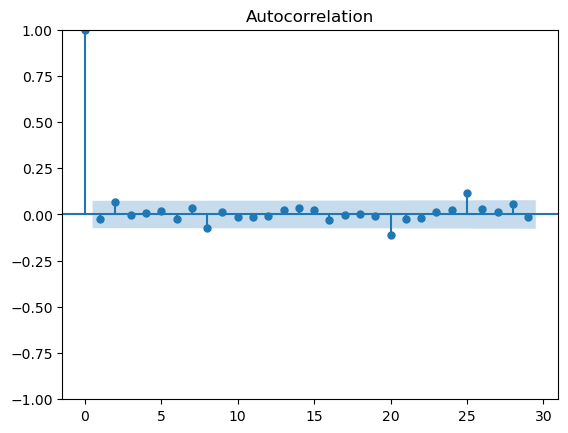

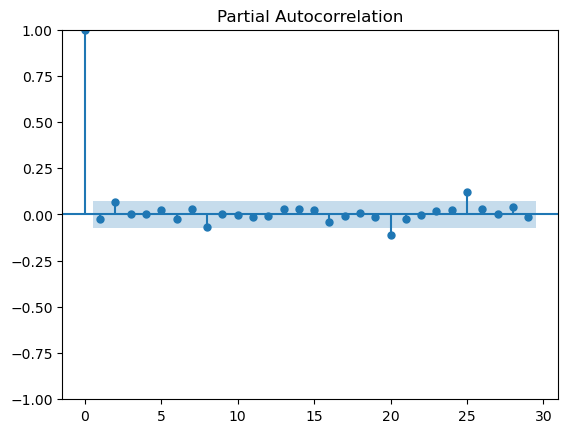

In [39]:
# Tracer ACF et PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_cleaned['log_close_diff'])
plot_pacf(data_cleaned['log_close_diff'])
plt.show()

Fonction d'autocorrélation (ACF) :

L'ACF chute brutalement après le lag 0, et les autocorrélations des lags suivants oscillent autour de zéro sans être significatives. Surtout, il n'y a pas non plus de décroissance significative des autocorrélations.
Donc on peut conclure qu'il n'y a pas d'autocorrélation marquée dans les données après le premier lag.

Fonction d'autocorrélation partielle (PACF) :

La PACF montre aussi une coupure nette après le lag 0, avec des valeurs non significatives pour les autres lags.

Il semble qu'on ait affaire à un ARMA(0,0), c'est-a-dire un modele sans partie Autoregressif (AR), ni partie Moyenne mobile (MA). Il n'y a ni terme autorégressif (AR) ni terme de moyenne mobile (MA) significatif. Donc les graphes ACF et PACF indiquent que les données suivent un bruit blanc. 

Le modèle approprié semble être un ARMA(0,0). On note tout de même qu'il y a quelques pics signficatifs. L'ordre maximal de la partie AR est 20 (voir PACF), et l'ordre maximal de la partie MA est 21. S'il s'avère que nos données suivent un bruit blanc, on utilisera tout de même un ARMA(20,20) pour comparer l'efficacité de la prédiction en ARMA vs. nos autres modèles (LSTM, GARCH). 

In [ ]:
# 4. Résidus 

Ayant conclu un modèle ARMA(0,0), un processus bruit blanc, on doit vérifier la blancheur des résidus.

Les caractéristiques des bruits blancs : 
- pas d'autocorrélation significative dans les résidus,
- la résidus suivent une loi normale

Pour tester l'autocorrelation des residus, on effectue le test de Ljung-Box 

Pour voir s'ils suivent une loi normale, 

In [43]:
# 4.1 Ljung Box test

from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_results = acorr_ljungbox(data_cleaned['log_close_diff'].dropna(), lags=[10], return_df=True)


In [44]:
ljung_box_results

,lb_stat,lb_pvalue
10,9.523992,0.483198


L'hypothèse nulle du test de Ljung est que les résidus sont des bruits blancs (pas d'autocorrélation des résidus). La p-valeur étant très grande, on ne peut pas rejeter l'hypothèse nulle. Donc on est bien en présence de résidus non autocorrélés.

In [ ]:
# 4.2 Distribution des résidus 

# On utilise un Q plot 
# On compare les quantiles des résidus vs. les quantiles d'une distrib. normale
# Plus les résidus se rapprochent de la ligne diagonale, plus la distrib. des résidus est normale

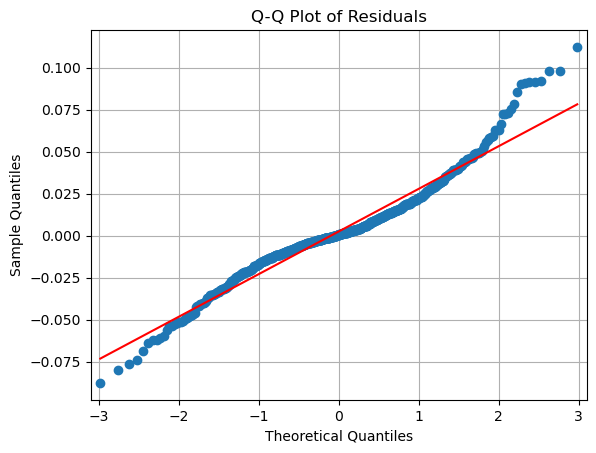

In [45]:
sm.qqplot(data_cleaned['log_close_diff'], line='s')
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()

Clairement, la distribution des résidus est quasi normale. On a aussi vu que d'après le Ljung box test, il n'y a pas d'autocorrélation des résidus. On peut conclure la blancheur des résidus.

In [ ]:
# 5. Prediction (facultative)

In [70]:
import pandas as pd
import numpy as np

data = pd.read_csv('BTCUSDT_daily_2023.csv')
data['log_close_diff'] = np.log(data['close']).diff()


In [71]:
# Clean up the data (drop NaN values)
data_bis = data.dropna(subset=['log_close_diff']).copy()  # Make an explicit copy here

# Ensure timestamp is a datetime type and set as index
data_bis['timestamp'] = pd.to_datetime(data_bis['timestamp'], errors='coerce', utc=True)  # Explicit datetime conversion
data_bis.set_index('timestamp', inplace=True)

# Explicitly set frequency (daily in this case)
data_bis = data_bis.asfreq('D')

# Extract log_close_diff series
series = data_bis['log_close_diff']

# Optionally, sort data by timestamp
series = series.sort_index()

In [15]:
series

timestamp
2023-01-02 00:00:00+00:00    0.003372
2023-01-03 00:00:00+00:00    0.000139
2023-01-04 00:00:00+00:00    0.010451
2023-01-05 00:00:00+00:00   -0.001099
2023-01-06 00:00:00+00:00    0.007033
                               ...   
2024-11-29 00:00:00+00:00    0.018809
2024-11-30 00:00:00+00:00   -0.010853
2024-12-01 00:00:00+00:00    0.008029
2024-12-02 00:00:00+00:00   -0.013932
2024-12-03 00:00:00+00:00   -0.001861
Freq: D, Name: log_close_diff, Length: 702, dtype: float64

In [72]:
# Specify the start date for modeling (example: '2023-06-01')
start_date = '2023-11-30'

# Filter data starting from the specified date
series = series[series.index <= start_date]


In [20]:
series

timestamp
2023-01-02 00:00:00+00:00    0.003372
2023-01-03 00:00:00+00:00    0.000139
2023-01-04 00:00:00+00:00    0.010451
2023-01-05 00:00:00+00:00   -0.001099
2023-01-06 00:00:00+00:00    0.007033
                               ...   
2023-11-26 00:00:00+00:00   -0.008860
2023-11-27 00:00:00+00:00   -0.005482
2023-11-28 00:00:00+00:00    0.015352
2023-11-29 00:00:00+00:00    0.000945
2023-11-30 00:00:00+00:00   -0.003458
Freq: D, Name: log_close_diff, Length: 333, dtype: float64

In [73]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(series.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -17.970374470461802
p-value: 2.7970201270645887e-30


In [108]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model parameters
p = 0
d = 0
q = 0

# Fit ARIMA model with the specified order
model = ARIMA(series, order=(p, d, q), enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit()


In [109]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         log_close_diff   No. Observations:                  333
Model:                          ARIMA   Log Likelihood                 783.849
Date:                Tue, 17 Dec 2024   AIC                          -1563.698
Time:                        21:23:26   BIC                          -1556.088
Sample:                    01-02-2023   HQIC                         -1560.663
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.001      1.843      0.065      -0.000       0.005
sigma2         0.0005   2.64e-05     19.726      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.04   Jarque-

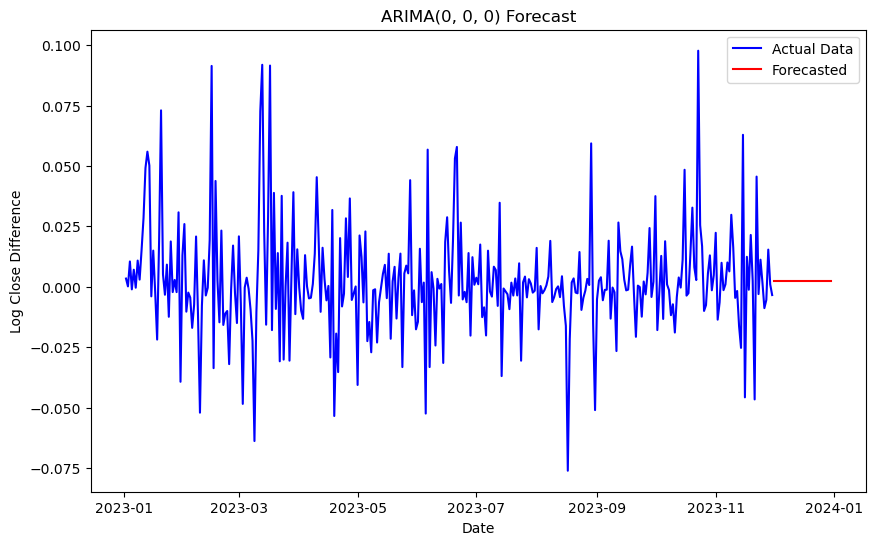

In [111]:
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Actual Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted', color='red')
plt.title("ARIMA(0, 0, 0) Forecast")
plt.xlabel('Date')
plt.ylabel('Log Close Difference')
plt.legend()
plt.show()

Lorsque les données différenciées en log se comportent comme du bruit blanc, il n'est pas surprenant que les prévisions d'un modèle ARIMA (ou ARMA) soient proches de zéro ou à plat. Cela se produit généralement lorsque la série temporelle ne présente pas de tendances claires, de cycles ou d'autocorrelations significatives.

Le bruit blanc désigne une séquence de variables aléatoires sans structure identifiable, caractérisée par l'absence de corrélation, une moyenne proche de zéro et une variance constante. Lorsqu'une différence en log est appliquée à une série temporelle, cela permet d'éliminer toute croissance exponentielle ou tendance à long terme, ne conservant que les variations à court terme (rendements). Si ces variations sont aléatoires (bruit blanc), le modèle aura des difficultés à identifier des structures ou des motifs à prédire.

Les modèles ARIMA (ou ARMA) sont conçus pour capturer les autocorrélations et les tendances dans les données. Cependant, si les données sont du bruit blanc, non corrélées et aléatoires, le modèle ne parviendra pas à identifier des motifs significatifs, ce qui entraînera des prévisions proches de la moyenne, qui, dans le cas des données différenciées en log, pourrait être proche de zéro.

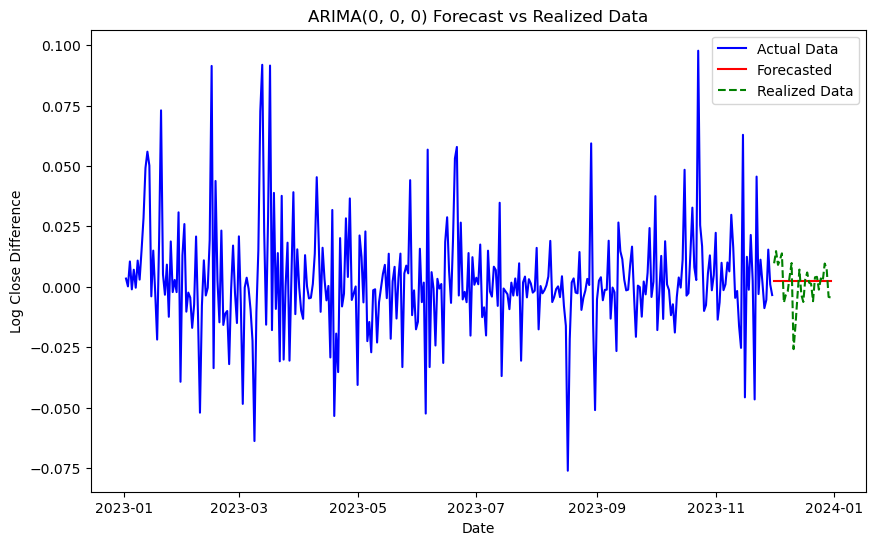

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast steps
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Create the forecast index (date range for the forecasted values)
forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Assume 'actual_realized_data' is the new data you want to plot alongside the forecast
# You should have access to this data, so load it or use a different dataset (if available) for the "realized" values
# For illustration purposes, we'll assume the new realized data starts from the day after the forecast period
# and we'll create a synthetic series. Replace it with actual data when available.

# Create synthetic realized data (replace this with your actual data)
realized_data = pd.Series([np.random.normal(loc=0, scale=0.01) for _ in range(forecast_steps)], 
                          index=forecast_index)

# Plot the actual data (series used for fitting the model)
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Actual Data', color='blue')

# Plot the forecasted values
plt.plot(forecast_index, forecast, label='Forecasted', color='red')

# Plot the realized data (if available)
plt.plot(realized_data.index, realized_data, label='Realized Data', color='green', linestyle='--')

# Add titles and labels
plt.title("ARIMA(0, 0, 0) Forecast vs Realized Data")
plt.xlabel('Date')
plt.ylabel('Log Close Difference')
plt.legend()

# Show the plot
plt.show()